In [1]:
#Assignment=EDA2

In [ ]:
!pip install ppscore


In [2]:
#IMPORT IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=30
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import IsolationForest



In [3]:
#LOAD THE DATASETS
df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#summary
summary=df.describe()
print(summary)

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#find missing value
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
#CHECK THE NUMERICAL COLUMNS
numeric=df.select_dtypes(include=['float64','int64']).columns
numeric

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [43]:
#SCALING NUMERIC COLUMNS
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric])



In [11]:
df_scaled

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [12]:
#CREATING DATAFRAME
scaled_df=pd.DataFrame(df_scaled,columns=numeric)
scaled_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [13]:
#USE MINMAXSCALER
minscaler=MinMaxScaler()
df_min=minscaler.fit_transform(df[numeric])

In [14]:
df_min

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [15]:
#create dataframe of df_min
min_df=pd.DataFrame(df_min,columns=numeric)
min_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [16]:
#identify the object columns
categorical=df.select_dtypes(include=['object'])
categorical

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [17]:
#check value counts
categorical['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [18]:
categorical['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [19]:
categorical['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [20]:
categorical['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [21]:
categorical['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [22]:
categorical['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [23]:
categorical['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [24]:
categorical['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [25]:
categorical['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [26]:
#USE ONEHOT ENCODING FOR LESS THEN 5 CATEGORICAL VALUE
df = pd.get_dummies(df, columns=['sex', 'relationship','income'], drop_first=True)
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    race  capital_gain  \
0        Never-married        Adm-clerical   White          2174   
1   Married-civ-spouse     Exec-managerial   White             0   
2             Divorced   Handlers-cleaners   White             0   
3   Married-civ-spouse   Handlers-cleaners   Black             0   
4   Married-civ-spouse      Prof-specialty   Black             0   

   capital_loss  hours_per_week  native_country  sex_ Male  \
0             0              40   United-States       True   
1             0              13   United-States       True   
2             0     

In [27]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,2174,0,40,United-States,True,True,False,False,False,False,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,0,0,13,United-States,True,False,False,False,False,False,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,0,0,40,United-States,True,True,False,False,False,False,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,0,0,40,United-States,True,False,False,False,False,False,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,0,0,40,Cuba,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,0,0,38,United-States,False,False,False,False,False,True,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,0,0,40,United-States,True,False,False,False,False,False,True
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,0,0,40,United-States,False,False,False,False,True,False,False
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,0,0,20,United-States,True,False,False,True,False,False,False


In [28]:
#more than 5 categories
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['workclass']


0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Name: workclass, Length: 32561, dtype: int32

In [29]:
df['native-country'] = le.fit_transform(df['native_country'])
df['native-country']



0        39
1        39
2        39
3        39
4         5
         ..
32556    39
32557    39
32558    39
32559    39
32560    39
Name: native-country, Length: 32561, dtype: int32

In [30]:
df['education'] = le.fit_transform(df['education'])
df['education']



0         9
1         9
2        11
3         1
4         9
         ..
32556     7
32557    11
32558    11
32559    11
32560    11
Name: education, Length: 32561, dtype: int32

In [31]:
df['occupation']=le.fit_transform(df['occupation'])
df['occupation']

0         1
1         4
2         6
3         6
4        10
         ..
32556    13
32557     7
32558     1
32559     1
32560     4
Name: occupation, Length: 32561, dtype: int32

In [32]:
df['race']=le.fit_transform(df['race'])
df['race']

0        4
1        4
2        4
3        2
4        2
        ..
32556    4
32557    4
32558    4
32559    4
32560    4
Name: race, Length: 32561, dtype: int32

In [33]:
df['marital_status']=le.fit_transform(df['marital_status'])
df['marital_status']

0        4
1        2
2        0
3        2
4        2
        ..
32556    2
32557    2
32558    6
32559    4
32560    2
Name: marital_status, Length: 32561, dtype: int32

In [34]:
df['age_education']=df['education_num']/df['age']
df['age_education']

0        0.333333
1        0.260000
2        0.236842
3        0.132075
4        0.464286
           ...   
32556    0.444444
32557    0.225000
32558    0.155172
32559    0.409091
32560    0.173077
Name: age_education, Length: 32561, dtype: float64

In [35]:
df['hours_per_week_per_age'] = df['hours_per_week'] / df['age']
df['hours_per_week_per_age']



0        1.025641
1        0.260000
2        1.052632
3        0.754717
4        1.428571
           ...   
32556    1.407407
32557    1.000000
32558    0.689655
32559    0.909091
32560    0.769231
Name: hours_per_week_per_age, Length: 32561, dtype: float64

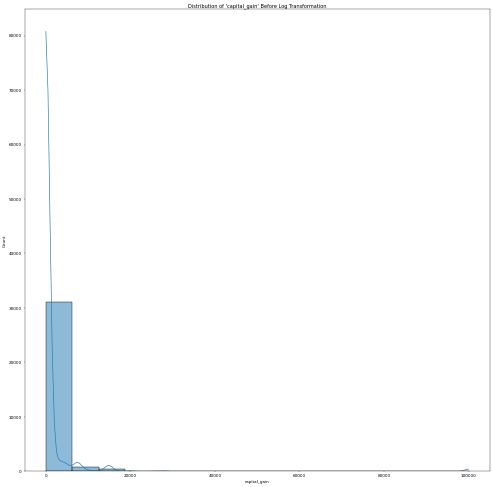

In [36]:


# Plotting the distribution before transformation
plt.figure(figsize=(20,20))
sns.histplot(df['capital_gain'], kde=True)
plt.title("Distribution of 'capital_gain' Before Log Transformation")
plt.show()


<Axes: ylabel='capital_gain'>

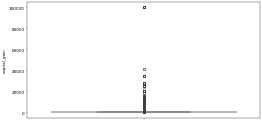

In [37]:
sns.boxplot(df['capital_gain'])

In [38]:
df['capital_gain_log'] = np.log(df['capital_gain']+1)
df['capital_gain_log']


0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain_log, Length: 32561, dtype: float64

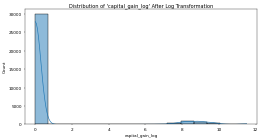

In [39]:
sns.histplot(df['capital_gain_log'], kde=True)
plt.title("Distribution of 'capital_gain_log' After Log Transformation")
plt.show()


In [40]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ >50K,native-country,age_education,hours_per_week_per_age,capital_gain_log
0,39,7,77516,9,13,4,1,4,2174,0,...,True,False,False,False,False,False,39,0.333333,1.025641,7.684784
1,50,6,83311,9,13,2,4,4,0,0,...,False,False,False,False,False,False,39,0.260000,0.260000,0.000000
2,38,4,215646,11,9,0,6,4,0,0,...,True,False,False,False,False,False,39,0.236842,1.052632,0.000000
3,53,4,234721,1,7,2,6,2,0,0,...,False,False,False,False,False,False,39,0.132075,0.754717,0.000000
4,28,4,338409,9,13,2,10,2,0,0,...,False,False,False,False,True,False,5,0.464286,1.428571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,4,0,0,...,False,False,False,False,True,False,39,0.444444,1.407407,0.000000
32557,40,4,154374,11,9,2,7,4,0,0,...,False,False,False,False,False,True,39,0.225000,1.000000,0.000000
32558,58,4,151910,11,9,6,1,4,0,0,...,False,False,False,True,False,False,39,0.155172,0.689655,0.000000
32559,22,4,201490,11,9,4,1,4,0,0,...,False,False,True,False,False,False,39,0.409091,0.909091,0.000000


In [48]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df[numeric])
df_outliers_removed = df[outliers == 1]


In [49]:
df_outliers_removed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ >50K,native-country,age_education,hours_per_week_per_age,capital_gain_log
0,39,7,77516,9,13,4,1,4,2174,0,...,True,False,False,False,False,False,39,0.333333,1.025641,7.684784
1,50,6,83311,9,13,2,4,4,0,0,...,False,False,False,False,False,False,39,0.260000,0.260000,0.000000
2,38,4,215646,11,9,0,6,4,0,0,...,True,False,False,False,False,False,39,0.236842,1.052632,0.000000
3,53,4,234721,1,7,2,6,2,0,0,...,False,False,False,False,False,False,39,0.132075,0.754717,0.000000
4,28,4,338409,9,13,2,10,2,0,0,...,False,False,False,False,True,False,5,0.464286,1.428571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,15,10,4,11,4,0,0,...,True,False,False,False,False,False,39,0.454545,1.818182,0.000000
32556,27,4,257302,7,12,2,13,4,0,0,...,False,False,False,False,True,False,39,0.444444,1.407407,0.000000
32557,40,4,154374,11,9,2,7,4,0,0,...,False,False,False,False,False,True,39,0.225000,1.000000,0.000000
32558,58,4,151910,11,9,6,1,4,0,0,...,False,False,False,True,False,False,39,0.155172,0.689655,0.000000


In [51]:
outliers

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
y_pred_outliers = clf.predict(df)

In [ ]:
y_pred_outliers